# Time lagged cross-correlation

Let's in the following example, denote the gaze angle data from the two individuals as a **A** and **B**. In in this example a sequence of 2.0 seconds is used and lagged 1.0 second, as in our analysis. Due to the frame rate of our system (60 fps) we will here obtain a minimum of 60 data points.

See the example below in a demonstrative example for how to identify the lag between a Sigmoid function and a 0.2 second shifted Sigmoid function. Gaussian noise is here added to mimic the actual gaze data.


In [1]:
def lagged_cross_corr(A, B, lag):
    if lag > 0:
        r = np.corrcoef(A[lag:], B[:2 * fps - lag])[0, 1]
    else:
        r = np.corrcoef(B[-lag:], A[:2 * fps + lag])[0, 1]
    return r

The above, Python function is used to estimate the correlation coefficient $r$ at the specific lag.


In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
#set parameters and create participant data
fps = 60 #frames per second
true_offset = 5
time = np.linspace(0, 2, 2 * fps)
A = 1 / (1 + np.exp(np.linspace(25, -25, 120)))  #participant A
B = 1 / (1 + np.exp(np.linspace(25 - true_offset, -25 - true_offset, 120))
         )  #participant B
A += np.random.normal(0, 0.01, 120)  #add gaussian noise
B += np.random.normal(0, 0.01, 120)  #add gaussian noise


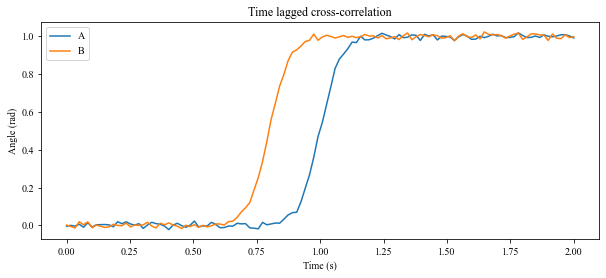

In [3]:
#plot figure 1
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=((10, 4)))
plt.title('Time lagged cross-correlation')
plt.xlabel('Time (s)'), plt.ylabel('Angle (rad)')
plt.plot(time, A, label='A')
plt.plot(time, B, label='B')
plt.legend()
plt.show()

The following code is used to lag the two time series A and B, 60 steps back and forth, while calculating the cross-correlation:

In [4]:
# lagg the time series up to 60 steps, 1 sec
r = []
lagg_time = np.linspace(-1, 1, 2 * fps, endpoint=True)
for lagg in range(-fps, fps, 1):
    r.append(lagged_cross_corr(A, B, lagg))
top = np.array(r).argmax()  #identify location of maximum correlation


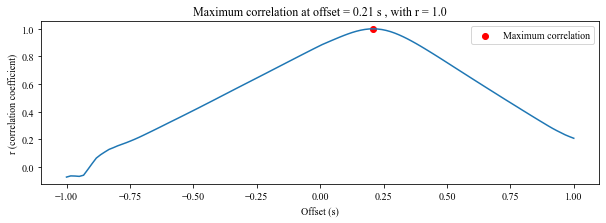

True offset:  0.21 s - Estimated offset:  0.2 s


In [5]:
#plot figure 2
fig = plt.figure(figsize=((10,3)))
plt.title('Maximum correlation at offset = ' + str(round(lagg_time[top], 2)) +
          ' s , with r = ' + str(round(r[top], 1)))
plt.plot(lagg_time, r), plt.xlabel('Offset (s)')
plt.ylabel('r (correlation coefficient)')
plt.scatter(lagg_time[top], r[top], c='r', label='Maximum correlation')
plt.legend()
plt.show()
print('True offset: ', round(lagg_time[top], 3), 's', '- Estimated offset: ',
      round(true_offset / 50 * 2, 3), 's')

## Offset and correlation estimate
The offset is printed out above in the Python example, which is here approximately 0.01 second from the actual measurement. This is due the discreteness of the time series data.